In [1]:
# sklearn.datasets : 데이터 세트
# sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등의 API 제공
# sklearn.preprocessing : 전처리에 필요한 다양한 가공 기능(인코딩, 정규화, 스케일링)
# sklearn.feature_selection : 알고리즘에 큰 영향을 주는 우선순위 대로 셀렉션 작업
# sklearn.feature_extraction : 추출
# sklearn.decompositioin : 차원축소
# sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈
# sklearn.ensemble : 앙상블 알고리즘
# sklearn.linear_model : 선형 회귀, 릿지, 라쏘, 로지스틱 회귀
# sklearn.naive_bayes : 나이브 베이즈, 가우시안 NB, 다항분포 NB
# sklearn.neighbors : 최근접 이웃 알고리즘, KNN
# sklearn.svm : 서포트 벡터 머신
# sklearn.tree : 의사결정트리
# sklearn.cluster : 비지도 클러스터링(K-평균, 계층형, DBSCAN)
# sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습

In [2]:
# 머신러닝 분류

# 정보이득이 큰 쪽으로
# 지니계수와 엔트로피가 작은 쪽으로

# decision tree >> 독립변수 선정에 사용가능

### sklearn.tree.DecisionTreeClassifier
- class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0

### sklearn.tree.DecisionTreeRegressor
- class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [3]:
# Tree 생성

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156) # 인자값 생각하기

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=11)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [4]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choose
 |      the best random split.
 |  
 |  max_d

In [5]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)

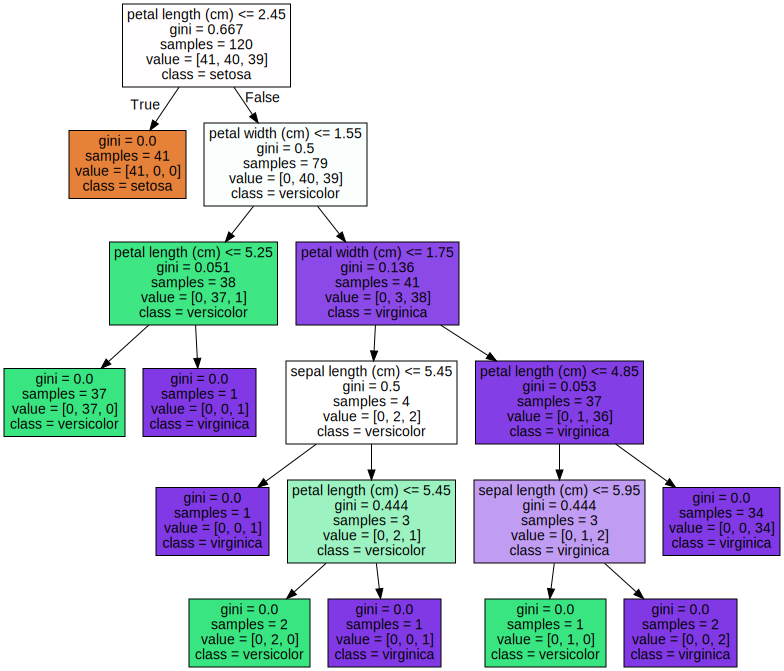

In [6]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화
with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


<AxesSubplot:>

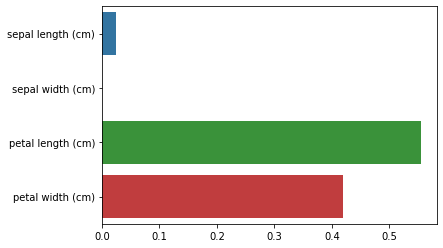

In [7]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출 / 독립변수 선정
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)


In [8]:
# 연습
# Tinanic 데이터를 가지고 decision tree를 이용하여 5개의 feature를 뽑아내기
# Logistic Regression으로 데이터를 80:20으로 훈련데이터와 테스트데이터로 나누기
# Accuracy 측정

# 타이타닉

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것

from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

# 원본 데이터를 재로딩 하고, feature 데이터 셋과 Label 데이터 셋 추출
titanic_df = pd.read_csv('./csv/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

X_titanic_df.columns
# Index값 확인


Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [9]:
X_titanic_df.iloc[:,[0,1,2,5,6]]

,Pclass,Sex,Age,Fare,Cabin
0,3,1,22.000000,7.2500,7
1,1,0,38.000000,71.2833,2
2,3,0,26.000000,7.9250,7
3,1,0,35.000000,53.1000,2
4,3,1,35.000000,8.0500,7
...,...,...,...,...,...
886,2,1,27.000000,13.0000,7
887,1,0,19.000000,30.0000,1
888,3,0,29.699118,23.4500,7
889,1,1,26.000000,30.0000,2


In [10]:
# Tree 생성

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156) # 인자값 생각하기

# 타이타닉 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=156)

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

# dt_clf.fit(X_titanic_df, y_titanic_df)

DecisionTreeClassifier(random_state=156)

Feature importances:
[0.083 0.299 0.258 0.042 0.01  0.243 0.048 0.016]
Pclass:0.083
Sex:0.299
Age:0.258
SibSp:0.042
Parch:0.010
Fare:0.243
Cabin:0.048
Embarked:0.016


<AxesSubplot:>

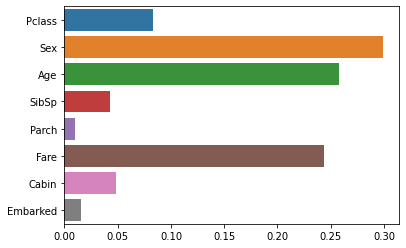

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print('Feature importances:\n{0}'.format(np.round(dt_clf.feature_importances_,3)))

# feature별 importance 매핑
for name, value in zip(X_titanic_df, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화 하기
sns.barplot(x=dt_clf.feature_importances_, y=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'])


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=156)

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_titanic_df.iloc[:,[0,1,2,5,6]], y_titanic_df, test_size=0.2, random_state=156)

# LogisticRegression 학습/예측/평가(5개 변수선정)
lr_clf.fit(X_train_1, y_train_1)
lr_pred = lr_clf.predict(X_test_1)
print('수정 LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test_1, lr_pred)))


LogisticRegression 정확도: 0.7821
수정 LogisticRegression 정확도: 0.8101


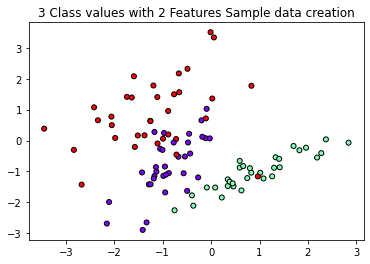

In [13]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해서 features는 2개, 결정값 클래스는 3가지 유형의 classification 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2, n_classes=3, n_clusters_per_class=1, random_state=5)

# plot 형태로 2개의 feature로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, cmap='rainbow', edgecolor='k')

In [14]:
import numpy as np

# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:,0], X[:,1], c=y, s=25, cmap='rainbow', edgecolor='k', clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start, xlim_end = ax.get_xlim()
    ylim_satrt, ylim_end = ax.get_ylim()

    # 호출 파라미터로 들어온 training 데이터로 model 학습
    model.fit(X,y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행
    xx, yy = np.meshgrid(np.linspace(xlim_start, xlim_end, num=200), np.linspace(ylim_satrt, ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf()를 이용하여 class boundary를 visualization 수행
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3, levels = np.arange(n_classes + 1) - 0.5, cmap='rainbow', clim=(y.min(),y.max()), zorder=1)
    


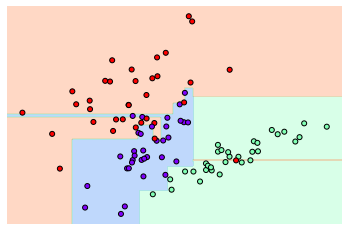

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 특정한 트리 생성 제약없는 결정 트리의 Decision Boundary 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

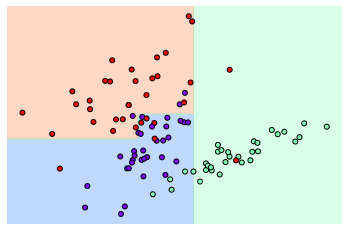

In [16]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 Decision Boundary 시각화

dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

In [17]:
# 결정 트리

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리 / 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

feature_name_df.head(20)

전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
5,6,tBodyAcc-std()-Z
6,7,tBodyAcc-mad()-X
7,8,tBodyAcc-mad()-Y
8,9,tBodyAcc-mad()-Z
9,10,tBodyAcc-max()-X


In [18]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [19]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)

    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df


In [20]:
import pandas as pd

def get_human_dataset():

    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+',
                                    header=None, names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./Human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./Human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./Human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./Human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [21]:
print('## 학습 피처 데이터 셋 info()')
print(X_train.info())

## 학습 피처 데이터 셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [22]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


In [23]:
# Null값 확인

X_train.isna().sum().sum()

0

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복시마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이버 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이버 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


In [25]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth' : [6,8,10,12,16,20,24]}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


KeyboardInterrupt: 

In [ ]:
# GridSearchCV 객체의 cv_result_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

In [ ]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

In [ ]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('결정 트리 예측 정확도:{0:.4f}'.format(accuracy))

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances_ = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances_.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
# 앙상블

# Voting Classifier

import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
data_df.head(3)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# 개별 모델은 로지스틱 회귀와 KNN임
lr_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)

# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('LR', lr_clf),('KNN',knn_clf)], voting='soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=107)

# VotingClassifier 학습/예측/평가
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

### sklearn.ensemble.RandomForestClassifier

- class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

### sklearn.ensemble.RandomForestRegressor

- class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

In [ ]:
# 배깅

# 전체 학습 데이터에서 데이터 샘플링(부트스트랩핑), 병렬적으로 처리 후 합

In [ ]:
# Random Forest

def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+',
                                    header=None, names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./Human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./Human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./Human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./Human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])

    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = \
        new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x: x[0]+'_'+str(x[1]) if x[1]>0 else x[0], axis=1)
    
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset():
    
    # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당
    feature_name_df = pd.read_csv('./Human_activity/features.txt', sep='\s+',
                                    header=None, names=['column_index','column_name'])

    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame 생성
    new_feature_name_df = get_new_feature_name_df(feature_name_df)

    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:,1].values.tolist()

    # 학습 피처 데이터 셋과 테스트 피처 데이터를 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./Human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    X_test = pd.read_csv('./Human_activity/test/X_test.txt', sep='\s+', names=feature_name)

    # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./Human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./Human_activity/test/y_test.txt', sep='\s+', header = None, names=['action'])

    # 로드된 학습/테스트용 DataFrame을 모두 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# 결정 트리에서 사용한 get_human_dataset()을 이용해 학습/테스트용 DataFrame 반환
X_train, X_test, y_train, y_test = get_human_dataset()

# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도:{0:.4f}'.format(accuracy))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split':[8,16,20]
}

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)
grid_cv = GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8, min_samples_split=8, random_state=0)

rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances_ = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances_.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### sklearn.ensemble.GradientBoostingClassifier

- class sklearn.ensemble.GradientBoostingClassifier(*, loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도:{0:.4f}'.format(gb_accuracy))
print('GBM 수행시간:{0:.1f}초'.format(time.time() - start_time))

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100,500],
    'learning_rate':[0.05, 0.1]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params, cv=2, verbose=1)
grid_cv.fit(X_train, y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도:{0:.4f}'.format(grid_cv.best_score_))

In [ ]:
# GridSearchCV를 이용하여 최적으로 학습된 estimator로 predict 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도:{0:.4f}'.format(gb_accuracy))

### XGB

- https://xgboost.readthedocs.io/en/stable/

- class xgboost.XGBRegressor(*, objective='reg:squarederror', **kwargs)

Parameters

n_estimators (int) – Number of gradient boosted trees. Equivalent to number of boosting rounds.

max_depth (Optional_[int]_) – Maximum tree depth for base learners.

learning_rate (Optional_[float]_) – Boosting learning rate (xgb’s “eta”)

verbosity (Optional_[int]_) – The degree of verbosity. Valid values are 0 (silent) - 3 (debug).

objective (Union[str, Callable[__[numpy.ndarray, numpy.ndarray]__, Tuple[numpy.ndarray, numpy.ndarray]], NoneType_]_) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

booster (Optional_[str]_) – Specify which booster to use: gbtree, gblinear or dart.

tree_method (Optional_[str]_) – Specify which tree method to use. Default to auto. If this parameter is set to default, XGBoost will choose the most conservative option available. It’s recommended to study this option from the parameters document: [https://xgboost.readthedocs.io/en/latest/treemethod.html](https://xgboost.readthedocs.io/en/latest/treemethod.html](https://xgboost.readthedocs.io/en/latest/treemethod.html)).

n_jobs (Optional_[int]_) – Number of parallel threads used to run xgboost. When used with other Scikit-Learn algorithms like grid search, you may choose which algorithm to parallelize and balance the threads. Creating thread contention will significantly slow down both algorithms.

gamma (Optional_[float]_) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (Optional_[float]_) – Minimum sum of instance weight(hessian) needed in a child.

max_delta_step (Optional_[float]_) – Maximum delta step we allow each tree’s weight estimation to be.

subsample (Optional_[float]_) – Subsample ratio of the training instance.

colsample_bytree (Optional_[float]_) – Subsample ratio of columns when constructing each tree.

colsample_bylevel (Optional_[float]_) – Subsample ratio of columns for each level.

colsample_bynode (Optional_[float]_) – Subsample ratio of columns for each split.

reg_alpha (Optional_[float]_) – L1 regularization term on weights (xgb’s alpha).

reg_lambda (Optional_[float]_) – L2 regularization term on weights (xgb’s lambda).

scale_pos_weight (Optional_[float]_) – Balancing of positive and negative weights.

base_score (Optional_[float]_) – The initial prediction score of all instances, global bias.

random_state (Optional_[Union[numpy.random.RandomState,_ int]__]) –

Markdown 7146 bytes 405 words 42 lines Ln 42, Col 416HTML 2215 characters 300 words 22 paragraphs

In [ ]:
import xgboost as xgb # pip install -U pip
from xgboost import plot_importance, XGBClassifier
import pandas as pd
import numpy as np
from  sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_labels = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_labels

cancer_df.head(3)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.3, random_state=33)

In [ ]:
xgb_clt = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb_clt.fit(X_train, y_train)
pred = xgb_clt.predict(X_test)
pred_proba = xgb_clt.predict_proba(X_test)

[21:33:08] WARNING: /private/var/folders/8b/f3d6s4_571bds9t_ch39vmn00000gn/T/pip-install-ko_rd4py/xgboost_df6f9aaaf36d49a68c312191d1ac1546/build/temp.macosx-10.9-universal2-3.10/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
def get_clt_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    F1 = f1_score(y_test, pred)
    AUC = roc_auc_score(y_test, pred)
    lr_probs = pred_proba[:,1]

    ns_probs = [0 for _ in range(len(y_test))]
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No skill')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='XGBOOST')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

    plt.legend()

    plt.show()

    print(f'오차행렬\n {confusion}')
    print(f'정확도\n {accuracy}')
    print(f'정밀도\n {precision}')
    print(f'재현율\n {recall}')
    print(f'f1_score\n {F1}')
    print(f'AUC\n {AUC}')


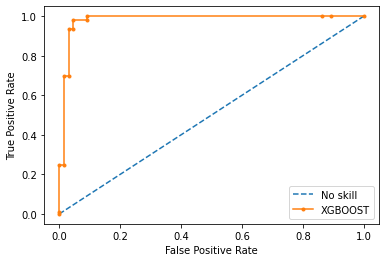

오차행렬
 [[ 62   4]
 [  2 103]]
정확도
 0.9649122807017544
정밀도
 0.9626168224299065
재현율
 0.9809523809523809
f1_score
 0.9716981132075471
AUC
 0.9601731601731602


In [ ]:
get_clt_eval(y_test, pred)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

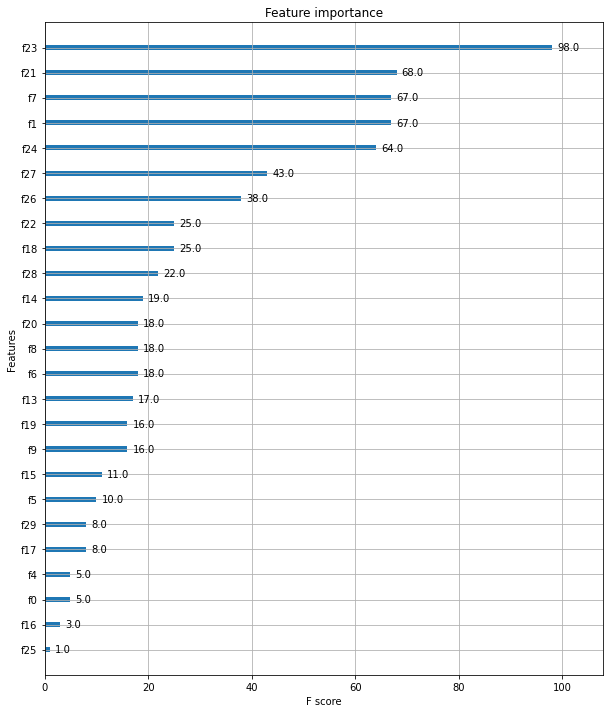

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))

plot_importance(xgb_clt, ax=ax)

In [ ]:
xgb_clt = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb_clt.fit(X_train, y_train, early_stopping_rounds=10, eval_metric='logloss', eval_set=[(X_test, y_test)], verbose=True) 
# 100동안 변화가 없으면 종료
# verbose : 부팅시 상세정보를 보여줌으로써, 어느부분에서 어떤 지연이 있는지 확인가능

pred = xgb_clt.predict(X_test)
pred_proba = xgb_clt.predict_proba(X_test)

ns_probs = [0 for _ in range(len(y_test))]
roc_curve(y_test, ns_probs)

[0]	validation_0-logloss:0.62010
[1]	validation_0-logloss:0.56119
[2]	validation_0-logloss:0.51014
[3]	validation_0-logloss:0.46654
[4]	validation_0-logloss:0.42558
[5]	validation_0-logloss:0.39549
[6]	validation_0-logloss:0.36630
[7]	validation_0-logloss:0.33984
[8]	validation_0-logloss:0.31631
[9]	validation_0-logloss:0.29928
[10]	validation_0-logloss:0.28105
[11]	validation_0-logloss:0.26554
[12]	validation_0-logloss:0.25485
[13]	validation_0-logloss:0.24102
[14]	validation_0-logloss:0.22999
[15]	validation_0-logloss:0.21921
[16]	validation_0-logloss:0.21092
[17]	validation_0-logloss:0.20469
[18]	validation_0-logloss:0.19673
[19]	validation_0-logloss:0.19110
[20]	validation_0-logloss:0.18536
[21]	validation_0-logloss:0.17891
[22]	validation_0-logloss:0.17304
[23]	validation_0-logloss:0.16803
[24]	validation_0-logloss:0.16512
[25]	validation_0-logloss:0.16000
[26]	validation_0-logloss:0.15849
[27]	validation_0-logloss:0.15714
[28]	validation_0-logloss:0.15459
[29]	validation_0-loglos

(array([0., 1.]), array([0., 1.]), array([1, 0]))

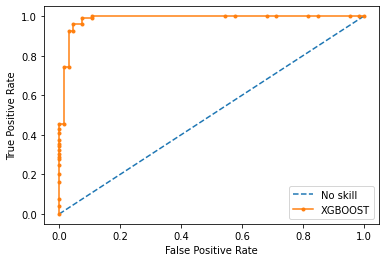

오차행렬
 [[ 62   4]
 [  4 101]]
정확도
 0.9532163742690059
정밀도
 0.9619047619047619
재현율
 0.9619047619047619
f1_score
 0.9619047619047619
AUC
 0.9506493506493507


In [ ]:
get_clt_eval(y_test, pred)

### 서포트 벡터 머신(SVM)

- class sklearn.svm.SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False, random_state=None)
#
- 분류와 회귀 방식에 모두 사용 가능
- 선형적인 경우뿐만 아니라 초평면(Hyper plane)과 같은 비선형적인 경우에도 사용가능
- 주어진 데이터 집합을 바탕으로 테스트 데이터가 비확률적인 이진 선형 분류 모델에도 적용할 수 있음

- 감마 : 감마의 값을 증가시키면 결정 경계가 더욱 복잡해지며 서포트 벡터 머신에서는 과도한 연산을 초래할 수 있지만 인식률을 향상
- 데이터의 양과 특성에 적절한 값을 설정

- C : 학습 시 잘못된 분류를 생성할 때 부여하는 벌점을 의미
- 큰 값을 설정하면 분류의 결과에 오버피팅을 초래
- 작은 값을 설정하면 언더피팅이 발생

In [ ]:
# SVM

# 서포트 벡터 머신은 결정 경계(분류를 위한 기준 선)를 정의하는 모델 

from sklearn.datasets import load_iris

iris =  load_iris()
X = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=156)

from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print(y_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, predictions))


### KNN 알고리즘

- KNN : 모든 기계 학습 알고리즘 중에서도 가장 간단하고 이해하기 쉬운 분류 알고리즘
- 데이터 관찰 >> 거리 계산 >> 이웃 탐색 >> 새로운 데이터 투표
#
- 단점 : 모든 데이터에 대한 값이 필요 / 계산시 시간이 오래걸림
- 장점 : 학습이나 준비시간이 필요 없음

In [ ]:
from sklearn.datasets import load_iris
iris =load_iris()
# print(iris.data)

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

# (80:20)으로 분할
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=4)

print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

0.9666666666666667

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

# 0 = setosa, 1 = versicolor, 2 = virginica
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

# 새로운 데이터 제시
x_new = [[3,4,5,2],[5,4,2,2]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

versicolor
setosa


### 학습모델

In [ ]:
# 학습 모델 / 데이터 일부 출력

from sklearn.datasets import load_iris

iris = load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[5.1 3.5 1.4 0.2]
0


In [ ]:
# 학습 모델 / 데이터 전부 출력

from sklearn.datasets import load_iris
iris = load_iris()
for i in range(len(iris.target)):
    print('Example %d: label %s, features %s' % (i, iris.target[i], iris.data[i]))

Example 0: label 0, features [5.1 3.5 1.4 0.2]
Example 1: label 0, features [4.9 3.  1.4 0.2]
Example 2: label 0, features [4.7 3.2 1.3 0.2]
Example 3: label 0, features [4.6 3.1 1.5 0.2]
Example 4: label 0, features [5.  3.6 1.4 0.2]
Example 5: label 0, features [5.4 3.9 1.7 0.4]
Example 6: label 0, features [4.6 3.4 1.4 0.3]
Example 7: label 0, features [5.  3.4 1.5 0.2]
Example 8: label 0, features [4.4 2.9 1.4 0.2]
Example 9: label 0, features [4.9 3.1 1.5 0.1]
Example 10: label 0, features [5.4 3.7 1.5 0.2]
Example 11: label 0, features [4.8 3.4 1.6 0.2]
Example 12: label 0, features [4.8 3.  1.4 0.1]
Example 13: label 0, features [4.3 3.  1.1 0.1]
Example 14: label 0, features [5.8 4.  1.2 0.2]
Example 15: label 0, features [5.7 4.4 1.5 0.4]
Example 16: label 0, features [5.4 3.9 1.3 0.4]
Example 17: label 0, features [5.1 3.5 1.4 0.3]
Example 18: label 0, features [5.7 3.8 1.7 0.3]
Example 19: label 0, features [5.1 3.8 1.5 0.3]
Example 20: label 0, features [5.4 3.4 1.7 0.2]
Ex

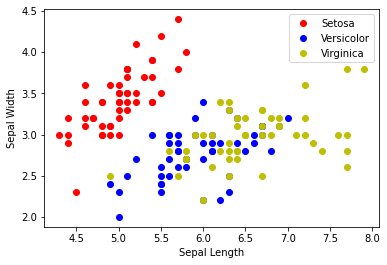

In [ ]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
sepal = iris.data[:,0:2]
kind = iris.target
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(sepal[kind==0][:,0], sepal[kind==0][:,1],'ro', label='Setosa')
plt.plot(sepal[kind==1][:,0], sepal[kind==1][:,1],'bo', label='Versicolor')
plt.plot(sepal[kind==2][:,0], sepal[kind==2][:,1],'yo', label='Virginica')
plt.legend()


### 파이프 라인

- 파이프라인을 사용하면 데이터 사전 처리 및 분류의 모든 단계를 포함하는 단일 개체를 만들 수 있다.
#
- train과 test 데이터 손실을 피할 수 있다.
- 교차 검증 및 기타 모델 선택 유형을 쉽게 만든다.
- 재현성 증가

In [ ]:
# Simplest possible Pipeline

# classifier와 전처리 단계(데이터 표준화)

from sklearn.datasets import make_regression,make_classification

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=100,n_features=10,n_informative=2)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# it takes a list of tuples as parameter
pipeline = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', LogisticRegression())
	])

# use the pipeline object as you would
# a regular classifier
pipeline.fit(X_train,y_train)


y_preds = pipeline.predict(X_test)

accuracy_score(y_test,y_preds)


array([[-9.12850865e-01,  1.08410578e+00,  2.54152907e-01,
        -3.66101252e-01, -2.80847151e-01, -7.27155146e-01,
         8.83794174e-01,  6.54026036e-01, -4.69471966e-02,
        -8.07221210e-01],
       [-1.32307666e+00, -2.06720670e-02,  2.93700353e-01,
        -1.59224410e+00,  1.12726273e+00, -2.84584734e-01,
         1.35176069e+00, -5.93846875e-01, -2.71633724e-01,
        -1.33324179e-01],
       [ 3.23479988e-01, -7.32627841e-01, -2.03198705e+00,
         5.79020309e-01, -2.43497960e+00, -1.93340447e-01,
         1.65704077e+00, -1.50209015e-01, -1.07431966e+00,
        -2.86351656e+00],
       [ 4.57335841e-01,  5.77082390e-01,  1.01399556e+00,
        -6.48527816e-01, -3.69635211e-01,  3.87875736e-01,
         1.42991999e+00,  3.87674597e-01, -1.12751611e+00,
        -1.24607174e+00],
       [ 5.13189880e-01, -2.98471042e-01,  3.94461978e-01,
         2.06854504e-01,  3.70836282e-02, -1.68409532e+00,
        -3.70341206e-01,  1.21797100e+00,  1.16153308e+00,
         2.

In [ ]:
# Pipeline for Text Classification/NLP , Pipeline with Cross-Validation

# 교차 검증을 수행하는 것은 모델 단계를 파이프라인을 사용해야 하는 주요 이유 중 하나이다.

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)

X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# this calculates a vector of term frequencies for 
# each document
vect = CountVectorizer()

# this normalizes each term frequency by the 
# number of documents having that term
tfidf = TfidfTransformer()

# this is a linear SVM classifier
clf = LinearSVC()

pipeline = Pipeline([
    ('vect',vect),
    ('tfidf',tfidf),
    ('clf',clf)
])

scores = cross_val_score(pipeline,X_train,y_train,cv=3,scoring='f1_micro')

scores

scores.mean()

# now train and predict test instances
pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)

# calculate f1
f1_score(y_test, y_preds, average='micro')

0.9747545582047685

In [ ]:
# Pipeline with Cross-Validation (GridSearchCV)

# 교차 검증하고 동시에 최상의 파라미터 구성을 선택하려면 GridSearchCV를 사용한다. 
# 이를 통해 모델을 랜덤 분할하여 일반화 상태가 양호한지 또는 오버핏인지를 알아내는 KFold 전략을 사용하여 
# 다양한 하이퍼 파라미터 구성을 쉽게 테스트할 수 있다. 
# 또한 GridSearchCV를 사용하면 반복할 하이퍼 파라미터 구성 값을 가진 ParameterGrid를 정의하고 
# 모든 조합을 테스트하고 점수를 매긴다.

from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups

cats = ['alt.atheism', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=cats)
newsgroups_test = fetch_20newsgroups(subset='test', categories=cats)

X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

pipeline = Pipeline([
    ('vect',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('clf',LinearSVC())
])

# this is where you define the values for
# GridSearchCV to iterate over

# l1 penalty is incompatible with other configs
param_grid = [
    {
        'vect__max_df':[0.8,0.9,1.0],
        'clf__penalty':['l2'],
        'clf__dual':[True,False]
    },
    {
        'vect__max_df':[0.8,0.9,1.0],
        'clf__penalty':['l1'],
        'clf__dual': [False]
    }
]

# do 3-fold cross validation for each of the 6 possible
# combinations of the parameter values above
grid = GridSearchCV(pipeline, cv=3, param_grid=param_grid,scoring='f1_micro')
grid.fit(X_train,y_train)

# summarize results
print("Best: %f using %s" % (grid.best_score_, 
    grid.best_params_))
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
# now train and predict test instances
# using the best configs
pipeline.set_params(clf__penalty='l2',vect__max_df=0.9,clf__dual=True)
pipeline.fit(X_train,y_train)
y_preds = pipeline.predict(X_test)

# calculate f1
f1_score(y_test, y_preds, average='micro')

In [ ]:
# Custom Pipeline step

# Trasnaper를 통해 파이프라인에서 수행할 수 있는 모든 작업(변수, 데이터 사전 처리 등)

# -*- coding: utf-8 -*-

import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class ToDenseTransformer(BaseEstimator,TransformerMixin):
    # here you define the operation it should perform
    def transform(self, X, y=None, **fit_params):
        return X.todense()

    # just return self
    def fit(self, X, y=None, **fit_params):
        return self

class SelectColumnsTransfomer(BaseEstimator, TransformerMixin):
    """ Select dataframe columns
    """

    def __init__(self, columns=None, ravel=None):

        if columns is None:
            self.columns = []
        elif type(columns) is not list:
            self.columns = [columns]
        else:
            self.columns = columns

        if ravel is None:
            self.ravel = False
        else:
            self.ravel = ravel

    def transform(self, X, **transform_params):

        cpy_df = X[self.columns].copy()

        if self.ravel:
            return cpy_df.values.ravel()
        else:
            return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self


class DataframeFunctionTransformer(BaseEstimator, TransformerMixin):
    """
    Apply an arbitrary function to a Dataframe column, as you would use a `map` funcion
    """

    def __init__(self, column_name, func, none_treatment=None):
        """
        :param column_name: the name of the dataframe column to which the function will be applied
        :param func: the function object, e.g. lambda
        :param none_treatment: what to do with NaN, Nones, etc. Default behaviour is to perform no
            special treatment, i.e. the function itself should treat nulls. Other options: 'return_none',
            returns the input itself in case it's null-lie (as per pd.isnull)
        """
        self.column_name = column_name
        self.func = func
        self.none_treatment = none_treatment

    def transform(self, in_df, **transform_params):
        cpy_df = in_df.copy()

        if self.column_name not in cpy_df.columns.values:
            raise ValueError('Provided column name is not part of the dataframe: "{}" '.format(self.column_name))

        if self.none_treatment is None:
            cpy_df[self.column_name] = cpy_df[self.column_name].map(self.func)
        elif self.none_treatment.upper() == "RETURN_NONE":
            cpy_df[self.column_name] = cpy_df[self.column_name].map(lambda x: x if pd.isnull(x) else self.func(x))
        else:
            raise ValueError(
                'Provided none treatment is invalid. Expected one of {}, got: '.format((None, 'return_none'),
                                                                                       self.none_treatment))

        return cpy_df

    def fit(self, X, y=None, **fit_params):
        return self

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Age     

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


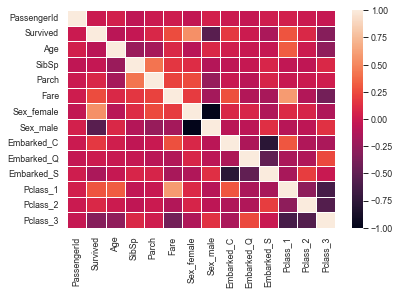

In [ ]:
# Pipeline 연습

# 초기 준비

import pandas as pd

titanic_train = pd.read_csv('./csv/titanic_train.csv')
titanic_test = pd.read_csv('./csv/titanic_test.csv')

# 순서대로
titanic_train.info() # 결측값 확인

titanic_train.isnull().sum() # 결측범주 확인

titanic_train.describe() # 간단 통계 정보

# 범주형 데이터 변환 (One-Hot Encoding)
train = pd.get_dummies(titanic_train, columns=['Sex','Embarked','Pclass'])
test = pd.get_dummies(titanic_test, columns=['Sex','Embarked','Pclass'])

# Age 결측값 처리
survived_1_age_mean = train[(train['Survived'] == 1)]['Age'].mean()
survived_0_age_mean = train[(train['Survived'] == 0)]['Age'].mean()

# Age 결측값을 생존자와 사망자의 나이 평균값으로 치환
train.loc[train['Survived'] == 1, 'Age'] = train[train['Survived'] == 1].fillna(survived_1_age_mean)
train.loc[train['Survived'] == 0, 'Age'] = train[train['Survived'] == 0].fillna(survived_0_age_mean)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# Cabin 확인
train['Cabin'].unique()

# 삭제 
train = train.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)
test = test.drop(columns=['Cabin', 'Name', 'Ticket'], axis=1)

# test 확인
test.info()

# Fare 결측치 평균값으로 치환
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

# 피어슨 상관계수로 관련성 분석
corr = train.corr(method='pearson')
print(corr)

# 시각화

import seaborn as sns
sns.set(context='paper', style='whitegrid', palette='muted', font_scale=1, color_codes=True, rc=None)
sns.heatmap(corr,linewidths=.5)

# sns.barplot(x=corr.Survived,y=corr.columns)

# 모델 학습

from sklearn.model_selection import train_test_split
X = train.drop('Survived', axis=1)
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=30)

# LogisticRegression을 사용하여, 모델을 학습

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = LogisticRegression()
model.fit(X_train, y_train)
prediction = model.predict(X_test)
cr = classification_report(y_test, prediction, output_dict=True)
print('accuracy =', cr['accuracy'])

# 캐글에서 제공한 test 데이터를 가지고 예측

pred = model.predict(test)

# 캐글에 제공할 submission.csv 파일을 생성

submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': pred})
submission.to_csv('submission.csv', index=False)

# submission 을 조회

submission.head()

# 캐글에 제출

!/home/jovyan/.local/bin/kaggle competitions submit -c titanic -f submission.csv -m "Message"
